___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [25]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [39]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install yfinance

In [59]:
import yfinance as yf
BAC = yf.download('BAC', start='2006-01-01', end='2016-01-01')
C = yf.download('C', start='2006-01-01', end='2016-01-01')
GS= yf.download('GS', start='2006-01-01', end='2016-01-01')
JPM = yf.download('JPM', start='2006-01-01', end='2016-01-01')
MS = yf.download('MS', start='2006-01-01', end='2016-01-01')
WFC = yf.download('WFC', start='2006-01-01', end='2016-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
WFC

Price,Close,High,Low,Open,Volume
Ticker,WFC,WFC,WFC,WFC,WFC
Date,,,,,
2006-01-03,18.675653,18.719562,18.262916,18.500021,11016400
2006-01-04,18.459044,18.628822,18.362445,18.617112,10870000
2006-01-05,18.438549,18.473675,18.330241,18.441476,10158000
2006-01-06,18.546852,18.602469,18.374146,18.488308,8403800
2006-01-09,18.543924,18.631742,18.473672,18.543924,5619600
...,...,...,...,...,...
2015-12-24,41.797504,42.003366,41.713634,41.911873,4999400
2015-12-28,41.690762,41.767005,41.301910,41.591642,8288800


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [61]:
tickers=['BAC','c','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [63]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks

BAC                                                      c  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173689  31.239902  30.557896  31.067744  16296700  321.442719   
2006-01-04  30.842617  31.279631  30.756538  31.120716  17757900  315.508087   
2006-01-05  30.882328  31.008137  30.670443  30.842601  14970700  317.073364   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  317.073364   
2006-01-09  30.855843  31.100837  30.696930  30.935302  15619400  315.573334   
...               ...        ...        ...        ...       ...         ...   
2015-12-24  14.103416  14.193246  14.062583  14.144248  29369400   39.868534   
2015-12-28  13.989090  14.070755  13.866594  14.062588  41777500   39.618923   
2015-12-29  14.111589  14.168754  14.013592  14.087090  45670400   40.072758   
2015-12-30  13.923757  14.078919  13.915592  14.046254  35066400   39.558426   
2015-12-31  13.744098  13.940092  13.744098  13.891094  47153000   39.142410   

                                                          ...         MS  \
Price             High         Low        Open    Volume  ...      Close   
Ticker               C           C           C         C  ...         MS   
Date                                                      ...              
2006-01-03  322.029646  313.747405  319.551499   1537600  ...  31.934698   
2006-01-04  320.203544  315.312451  318.638399   1870960  ...  31.956579   
2006-01-05  318.116782  315.638635  315.899490   1143160  ...  32.044220   
2006-01-06  318.899365  314.334343  318.768928   1370210  ...  32.077065   
2006-01-09  317.855844  314.986407  316.942844   1680740  ...  32.416630   
...                ...         ...         ...       ...  ...        ...   
2015-12-24   40.065193   39.671878   39.694568   4671200  ...  24.789007   
2015-12-28   39.762633   39.301244   39.762633   8761700  ...  24.552418   
2015-12-29   40.254289   39.891229   39.906354  10155100  ...  24.842432   
2015-12-30   40.042506   39.520608   39.966869   8763300  ...  24.598206   
2015-12-31   39.626490   39.142410   39.384450  11281800  ...  24.277660   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.033279  31.074855  31.310351  5377000  18.675653  18.719562   
2006-01-04  32.465913  31.956579  32.148265  7977800  18.459044  18.628822   
2006-01-05  32.088035  31.775862  32.066127  5778000  18.438549  18.473675   
2006-01-06  32.230412  31.792276  32.186599  6889800  18.546852  18.602469   
2006-01-09  32.471398  32.104458  32.109936  4144500  18.543924  18.631742   
...               ...        ...        ...      ...        ...        ...   
2015-12-24  24.964545  24.758478  24.857696  2798200  41.797504  42.003366   
2015-12-28  24.697429  24.384514  24.697429  5420300  41.690762  41.767005   
2015-12-29  24.956914  24.674528  24.758479  6388200  42.155861  42.201606   
2015-12-30  24.918755  24.575310  24.804272  5057200  41.850872  42.171102   
2015-12-31  24.651632  24.247133  24.353982  8154300  41.446777  41.896623   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.262916  18.500021  11016400  
2006-01-04  18.362445  18.617112  10870000  
2006-01-05  18.330241  18.441476  10158000  
2006-01-06  18.374146  18.488308   8403800  
2006-01-09  18.473672  18.543924   5619600  
...               ...        ...       ...  
2015-12-24  41.713634  41.911873   4999400  
2015-12-28

** Set the column name levels (this is filled out for you):**

In [66]:
print(bank_stocks.columns.nlevels)

3


In [67]:
print(bank_stocks.columns)

MultiIndex([('BAC',  'Close', 'BAC'),
            ('BAC',   'High', 'BAC'),
            ('BAC',    'Low', 'BAC'),
            ('BAC',   'Open', 'BAC'),
            ('BAC', 'Volume', 'BAC'),
            (  'c',  'Close',   'C'),
            (  'c',   'High',   'C'),
            (  'c',    'Low',   'C'),
            (  'c',   'Open',   'C'),
            (  'c', 'Volume',   'C'),
            ( 'GS',  'Close',  'GS'),
            ( 'GS',   'High',  'GS'),
            ( 'GS',    'Low',  'GS'),
            ( 'GS',   'Open',  'GS'),
            ( 'GS', 'Volume',  'GS'),
            ('JPM',  'Close', 'JPM'),
            ('JPM',   'High', 'JPM'),
            ('JPM',    'Low', 'JPM'),
            ('JPM',   'Open', 'JPM'),
            ('JPM', 'Volume', 'JPM'),
            ( 'MS',  'Close',  'MS'),
            ( 'MS',   'High',  'MS'),
            ( 'MS',    'Low',  'MS'),
            ( 'MS',   'Open',  'MS'),
            ( 'MS', 'Volume',  'MS'),
            ('WFC',  'Close', 'WFC'),
            

In [72]:
bank_stocks.columns.names = ['Name','Stock Info','Tickers']

** Check the head of the bank_stocks dataframe.**

In [76]:
bank_stocks.head()

Name              BAC                                                      c  \
Stock Info      Close       High        Low       Open    Volume       Close   
Tickers           BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173689  31.239902  30.557896  31.067744  16296700  321.442719   
2006-01-04  30.842617  31.279631  30.756538  31.120716  17757900  315.508087   
2006-01-05  30.882328  31.008137  30.670443  30.842601  14970700  317.073364   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  317.073364   
2006-01-09  30.855843  31.100837  30.696930  30.935302  15619400  315.573334   

Name                                                     ...         MS  \
Stock Info        High         Low        Open   Volume  ...      Close   
Tickers              C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  322.029646  313.747405  319.551499  1537600  ...  31.934698   
2006-01-04  320.203544  315.312451  318.638399  1870960  ...  31.956579   
2006-01-05  318.116782  315.638635  315.899490  1143160  ...  32.044220   
2006-01-06  318.899365  314.334343  318.768928  1370210  ...  32.077065   
2006-01-09  317.855844  314.986407  316.942844  1680740  ...  32.416630   

Name                                                        WFC             \
Stock Info       High        Low       Open   Volume      Close       High   
Tickers            MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.033279  31.074855  31.310351  5377000  18.675653  18.719562   
2006-01-04  32.465913  31.956579  32.148265  7977800  18.459044  18.628822   
2006-01-05  32.088035  31.775862  32.066127  5778000  18.438549  18.473675   
2006-01-06  32.230412  31.792276  32.186599  6889800  18.546852  18.602469   
2006-01-09  32.471398  32.104458  32.109936  4144500  18.543924  18.631742   

Name                                        
Stock Info        Low       Open    Volume  
Tickers           WFC        WFC       WFC  
Date                                        
2006-01-03  18.262916  18.500021  11016400  
2006-01-04  18.362445  18.617112  10870000  
2006-01-05  18.330241  18.441476  10158000  
2006-01-06  18.374146  18.488308   8403800  
2006-01-09  18.473672  18.543924   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [84]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Name,BAC,c,GS,JPM,MS,WFC
Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,31.173689,321.442719,95.293114,24.093313,31.934698,18.675653
2006-01-04,30.842617,315.508087,93.976883,23.954260,31.956579,18.459044
2006-01-05,30.882328,317.073364,93.939919,24.026800,32.044220,18.438549
2006-01-06,30.835981,317.073364,95.270935,24.196089,32.077065,18.546852
2006-01-09,30.855843,315.573334,96.417084,24.589079,32.416630,18.543924
...,...,...,...,...,...,...
2015-12-24,14.103416,39.868534,150.992554,51.309479,24.789007,41.797504
2015-12-28,13.989090,39.618923,150.289169,51.139980,24.552418,41.690762


In [86]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Name  Tickers
BAC   BAC         37.699570
c     C          383.228302
GS    GS         186.076050
JPM   JPM         53.603737
MS    MS          50.061134
WFC   WFC         44.026562
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [87]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [90]:
for tick in tickers:
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,cReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005771,0.000685,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


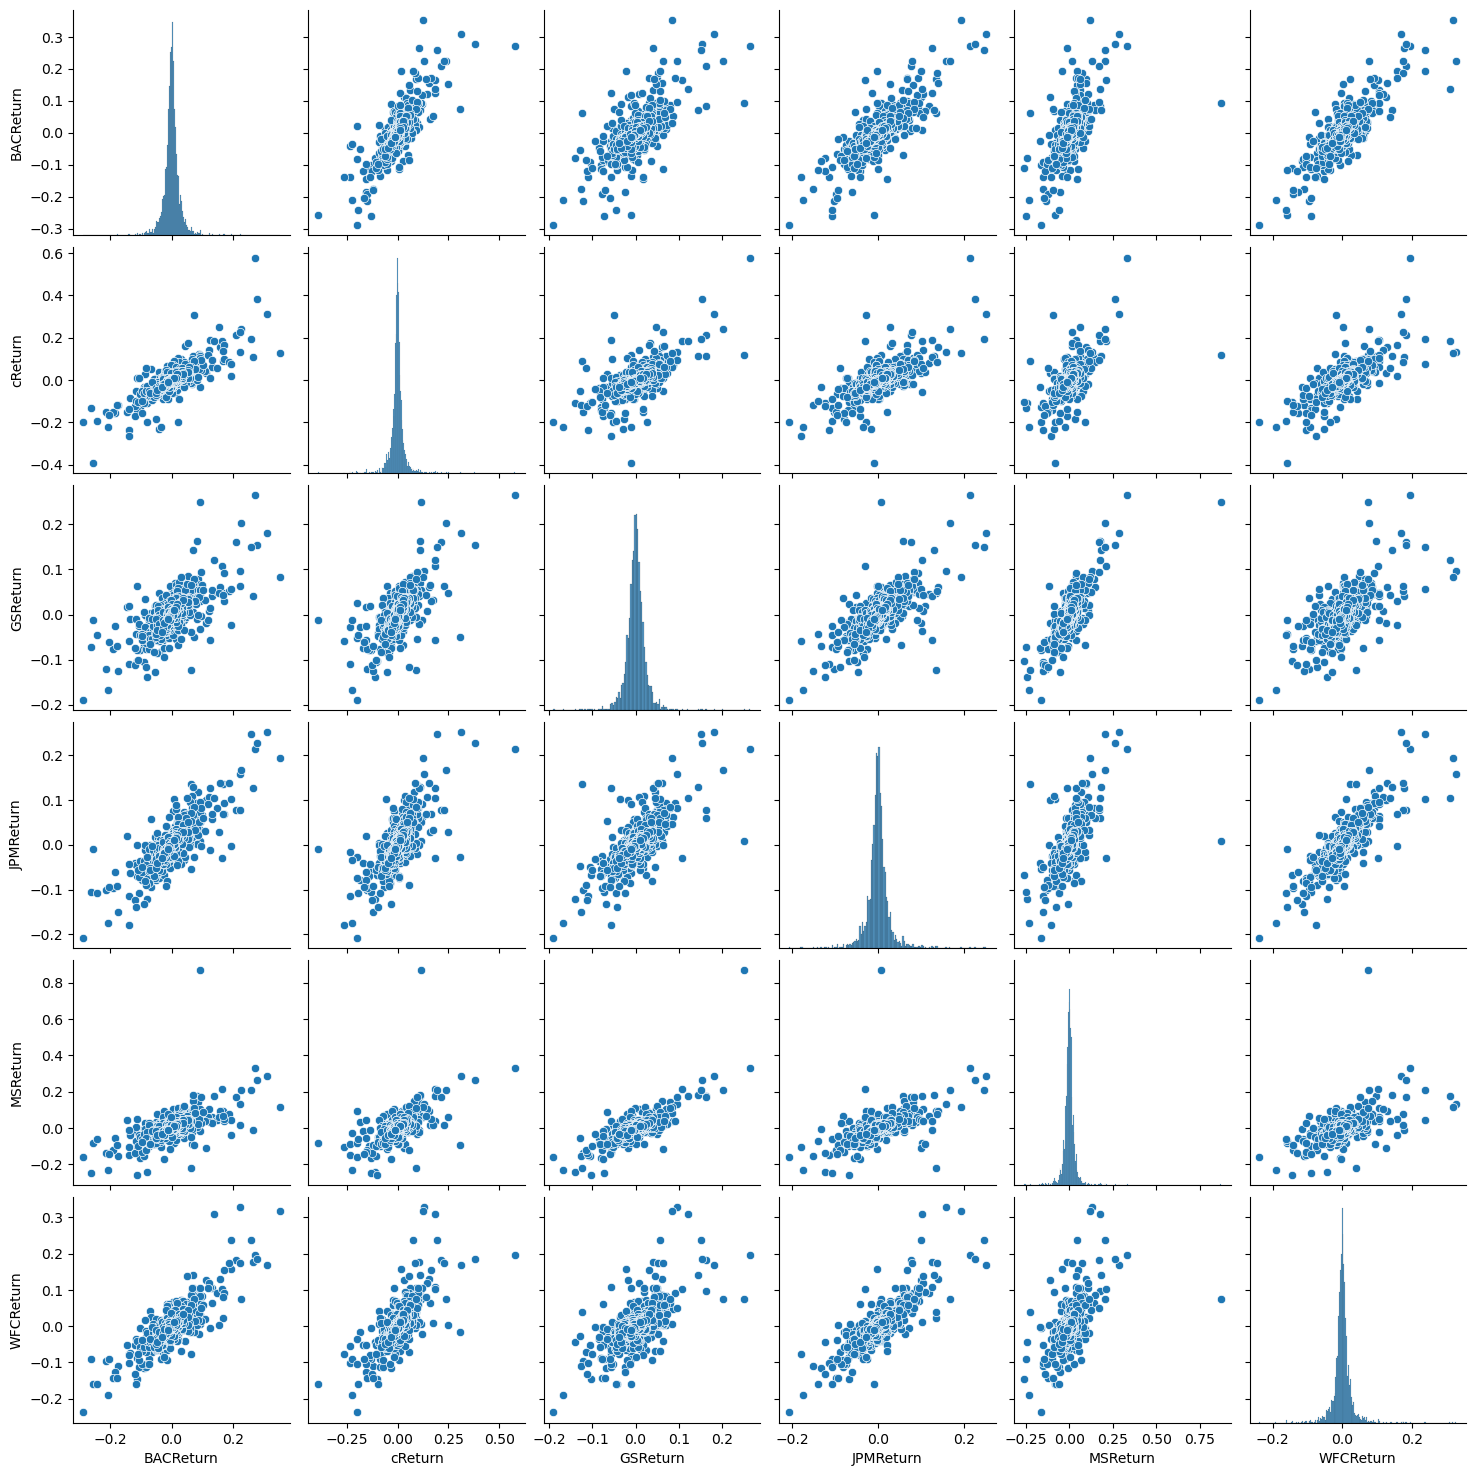

In [92]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [93]:
returns.idxmin()

BACReturn   2009-01-20
cReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [94]:
returns.idxmax()

BACReturn   2009-04-09
cReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [95]:
returns.std()

BACReturn    0.036659
cReturn      0.038672
GSReturn     0.025386
JPMReturn    0.027675
MSReturn     0.037717
WFCReturn    0.030195
dtype: float64

In [99]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016174
cReturn      0.015288
GSReturn     0.014043
JPMReturn    0.014006
MSReturn     0.016287
WFCReturn    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\sarad\AppData\Local\Temp\ipykernel_6692\1046204574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=100)


<Axes: xlabel='MSReturn', ylabel='Density'>

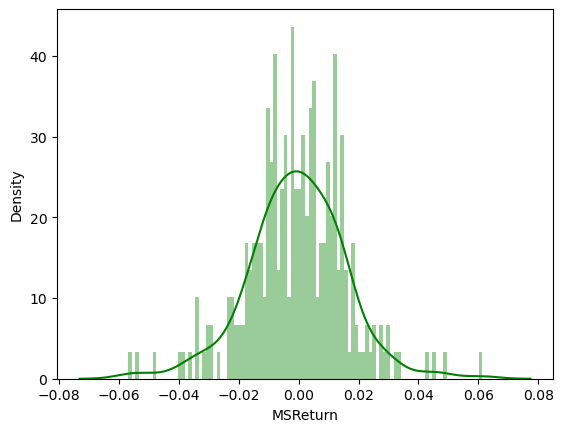

In [103]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\sarad\AppData\Local\Temp\ipykernel_6692\1549447448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['cReturn'],color='red',bins=100)


<Axes: xlabel='cReturn', ylabel='Density'>

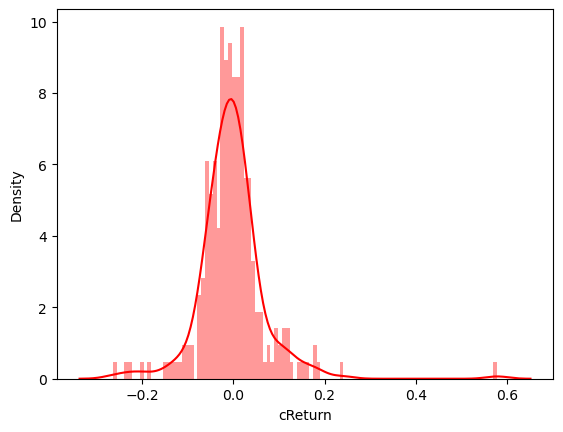

In [105]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['cReturn'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

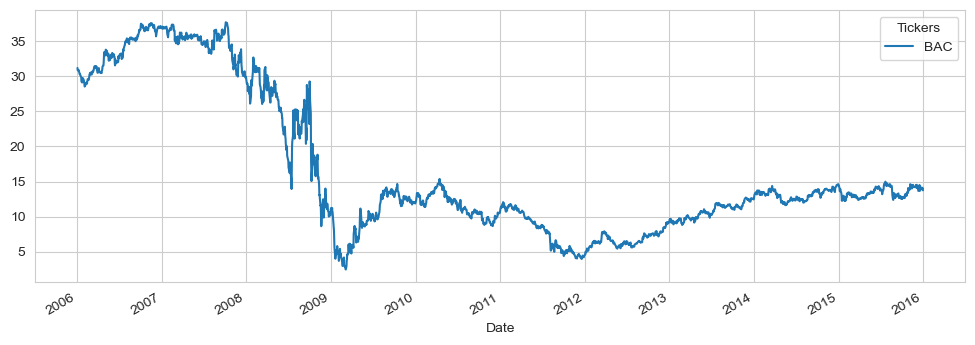

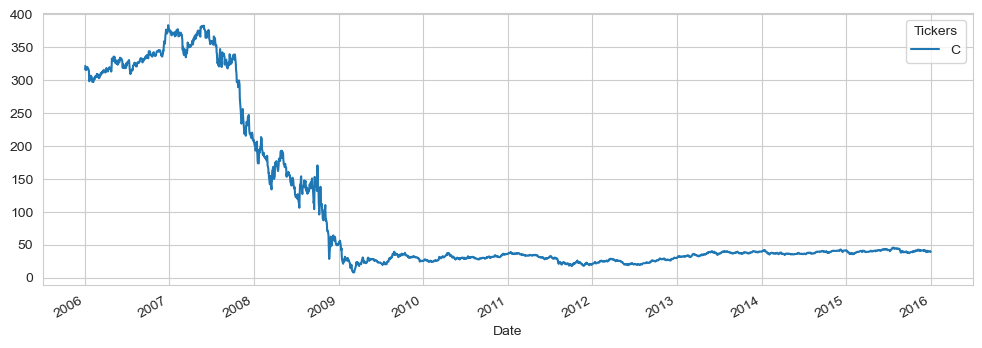

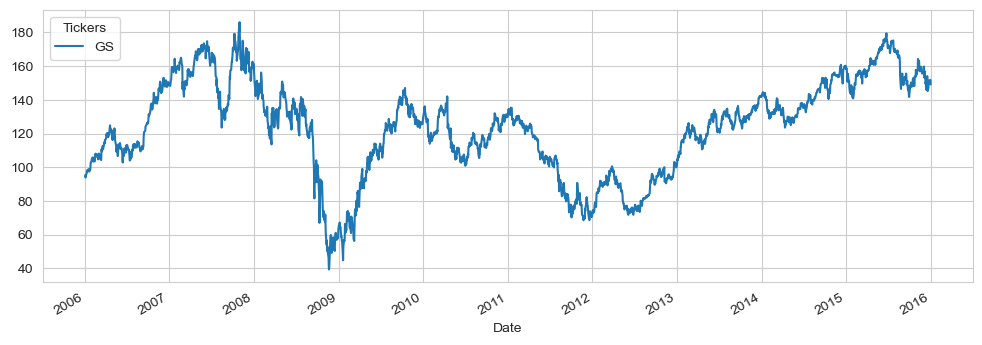

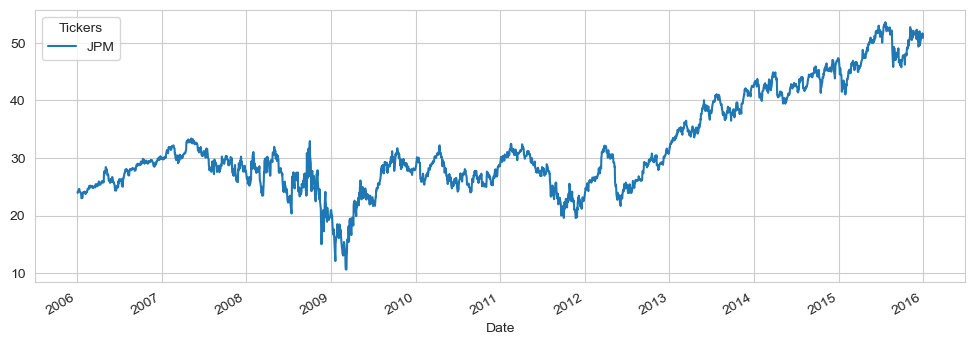

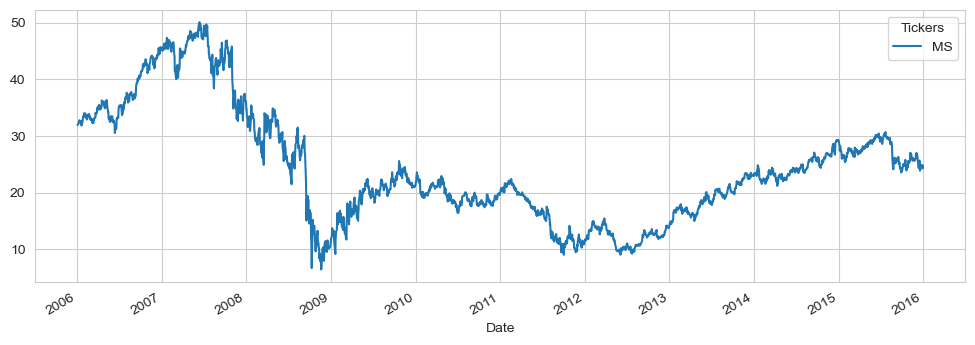

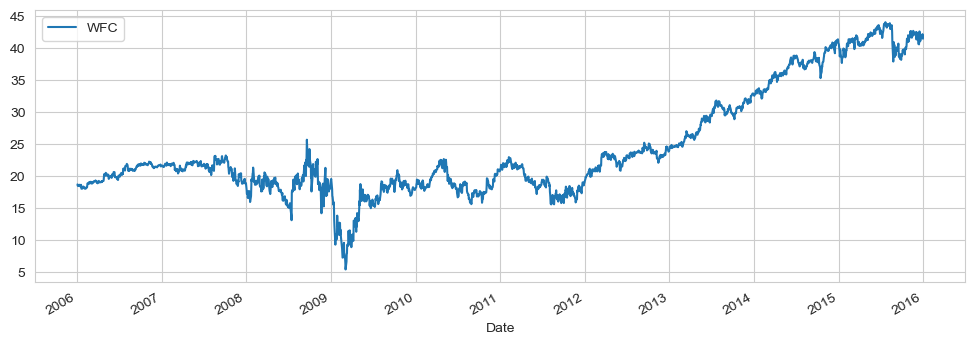

In [109]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

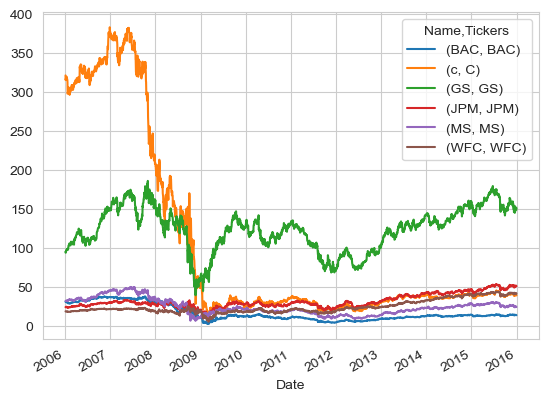

In [111]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [112]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

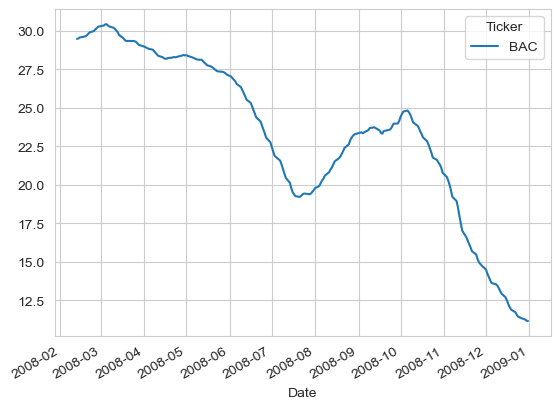

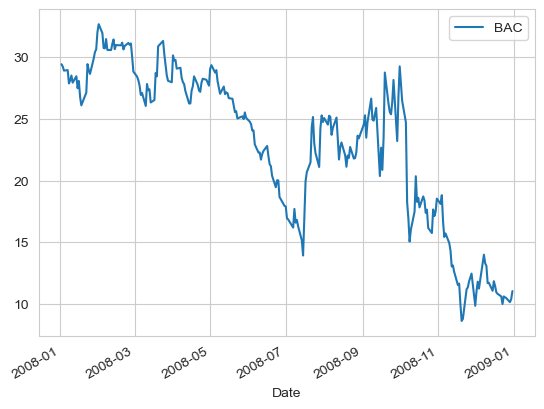

In [124]:
plt.figure(figsize=(12,6))

BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

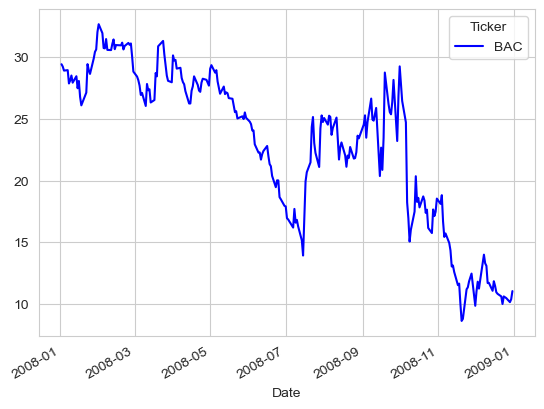

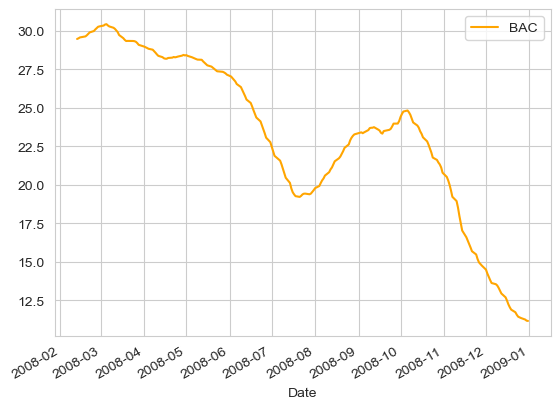

In [125]:
plt.figure(figsize=(12,6))

BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close', color='blue')
rolling_avg = BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean()
rolling_avg.plot(label='30 Day Avg', color='orange')



plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Name-Tickers', ylabel='Name-Tickers'>

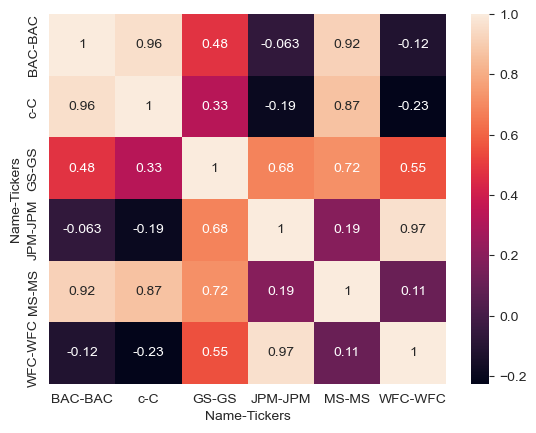

In [126]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

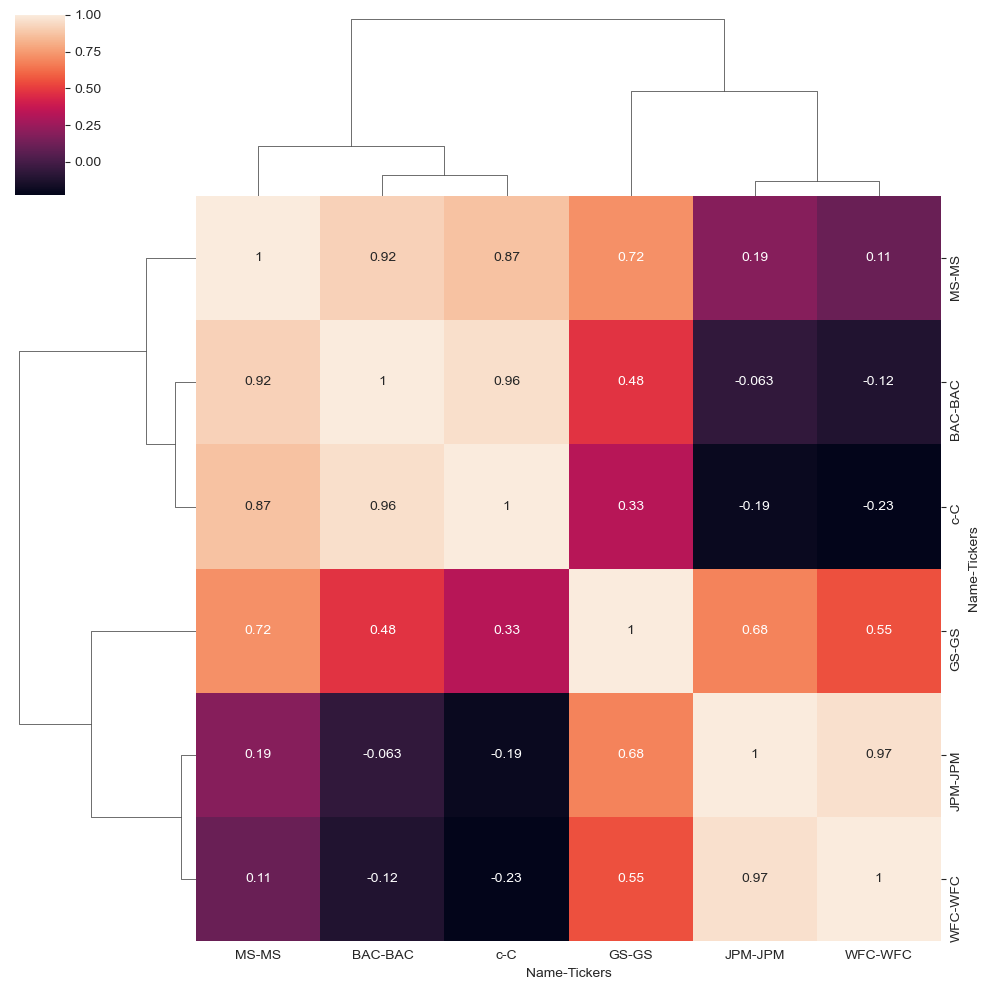

In [127]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [128]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
BAC.head()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
!pip install plotly --upgrade

In [ ]:
BAC[['Close','High', 'Low', 'Open', 'Volume']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')
plt.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.